In [145]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
df = pd.read_csv("forestfires (1).csv")#,encoding = "cp1252")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [146]:
df=df.replace(0.0,np.NaN)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,NaN,NaN
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,NaN,NaN
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,NaN,NaN
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,NaN
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,NaN,NaN


In [147]:
dummies=pd.get_dummies(df.month)
dummies.head()

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0


In [148]:
dummies2=pd.get_dummies(df.day)
dummies2.head()

,fri,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0


In [149]:
merged=pd.concat([df,dummies,dummies2],axis='columns')
merged.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,nov,oct,sep,fri,mon,sat,sun,thu,tue,wed
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,...,0,0,0,1,0,0,0,0,0,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,...,0,1,0,0,0,0,0,0,1,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,...,0,1,0,0,0,1,0,0,0,0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,...,0,0,0,1,0,0,0,0,0,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,...,0,0,0,0,0,0,1,0,0,0


In [150]:
final=merged.drop(['month','dec','day','mon'],axis='columns')
final.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,may,nov,oct,sep,fri,sat,sun,thu,tue,wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,NaN,...,0,0,0,0,1,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,NaN,...,0,0,1,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,NaN,...,0,0,1,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,NaN,...,0,0,0,0,0,0,1,0,0,0


In [151]:
import math
p= (final['rain'].median())
p

0.6000000000000001

In [152]:
final['rain'] =final['rain'].fillna(p)
final.rain

0      0.6
1      0.6
2      0.6
3      0.2
4      0.6
5      0.6
6      0.6
7      0.6
8      0.6
9      0.6
10     0.6
11     0.6
12     0.6
13     0.6
14     0.6
15     0.6
16     0.6
17     0.6
18     0.6
19     0.6
20     0.6
21     0.6
22     0.6
23     0.6
24     0.6
25     0.6
26     0.6
27     0.6
28     0.6
29     0.6
      ... 
487    0.6
488    0.6
489    0.6
490    0.6
491    0.6
492    0.6
493    0.6
494    0.6
495    0.6
496    0.6
497    0.6
498    0.6
499    0.4
500    0.8
501    0.8
502    0.4
503    0.6
504    0.6
505    0.6
506    0.6
507    0.6
508    0.6
509    1.4
510    0.6
511    0.6
512    0.6
513    0.6
514    0.6
515    0.6
516    0.6
Name: rain, Length: 517, dtype: float64

In [153]:
final=final.dropna()
final.area.head()

138    0.36
139    0.43
140    0.47
141    0.55
142    0.61
Name: area, dtype: float64

In [154]:
X =final.drop('temp',axis='columns')
X.head()
 

,X,Y,FFMC,DMC,DC,ISI,RH,wind,rain,area,...,may,nov,oct,sep,fri,sat,sun,thu,tue,wed
138,9,9,85.8,48.3,313.4,3.9,42,2.7,0.6,0.36,...,0,0,0,0,0,0,0,0,1,0
139,1,4,91.0,129.5,692.6,7.0,38,2.2,0.6,0.43,...,0,0,0,1,0,0,0,0,1,0
140,2,5,90.9,126.5,686.5,7.0,39,1.8,0.6,0.47,...,0,0,0,1,0,0,0,0,0,0
141,1,2,95.5,99.9,513.3,13.2,31,4.5,0.6,0.55,...,0,0,0,0,0,0,0,0,0,1
142,8,6,90.1,108.0,529.8,12.5,51,8.9,0.6,0.61,...,0,0,0,0,1,0,0,0,0,0


In [155]:
Y=final.temp
Y

138    18.0
139    21.7
140    21.9
141    23.3
142    21.2
143    16.6
144    23.8
145    27.4
146    13.2
147    24.2
148    17.4
149    23.7
150    23.2
151    24.8
152    24.6
153    20.1
154    29.6
155    16.4
156    28.6
157    18.4
158    20.5
159    19.0
160    16.1
161    20.3
162    15.2
163    17.8
164    17.8
165     5.3
166    16.6
167    23.4
       ... 
471    18.0
472    14.3
473    24.5
474    26.4
475    22.7
476    27.2
477    26.1
478    18.2
479    22.6
480    30.2
482    23.4
484    33.1
485    30.6
486    24.1
487    26.4
488    19.4
493    27.5
494    30.8
496    32.6
497    32.3
498    33.3
499    27.3
503    29.2
504    28.9
505    26.7
509    21.1
510    18.2
512    27.8
513    21.9
514    21.2
Name: temp, Length: 270, dtype: float64

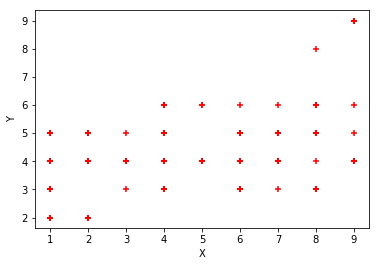

In [156]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(final.X,final.Y,color="red",marker="+")

In [211]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()

In [212]:
clf.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [213]:
clf.intercept_

10.207045946264516

In [214]:
clf.coef_

array([-1.04779128e-01,  3.08881199e-01, -3.49735471e-02,  5.97275615e-03,
        6.33901125e-03,  1.64161931e-01, -2.00924006e-01, -1.97045751e-01,
        4.36925213e+00,  3.01761232e-03,  8.98054253e+00,  1.47641393e+01,
        9.25999051e+00,  8.15347789e-13,  1.69155919e+01,  1.75517505e+01,
        9.72984438e+00,  1.58931735e+01, -3.45501405e-13,  9.96359142e+00,
        1.17862986e+01, -9.41258660e-01, -1.96143581e-01,  1.29324627e+00,
       -1.35212968e+00,  4.80979356e-02, -5.15268007e-01])

In [216]:
final.columns

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'apr', 'aug', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep', 'fri', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [217]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=40)
print(X_train.shape); print(X_test.shape)

(243, 27)
(27, 27)


In [218]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape )

(243, 27) (27, 27) (243,) (27,)


In [219]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()

In [220]:
clf.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [221]:
#Y_pred=clf.predict(X_test)
clf.predict(X_test)

array([18.16788201, 22.85637843,  2.32974122, 29.01679894, 23.42242062,
       27.69526062, 23.87619655, 20.35181653, 21.4698905 , 20.30137416,
       21.95238117, 22.38176431, 26.99200264, 22.6954277 , 23.68891484,
       22.5660549 , 23.46603681, 16.45650997, 14.98443024, 22.61620044,
       17.65331706, 25.37591468, 27.17367835, 20.10527853,  3.51313354,
        2.6137108 , 18.54743926])

In [222]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [223]:
mean_absolute_error(Y_test,Y_pred)

2.2211568326881723

In [224]:
clf.score(X,Y)

0.8118480407814778

In [225]:
#print(X.shape,Y.shape)

In [226]:
#print(X_train.shape,Y_train.shape)

In [227]:
#print(final.X.shape,Y_pred.shape)

In [228]:
# %matplotlib inline
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.scatter(final.X,final.Y,color="red",marker="+")
# plt.scatter(X_train,Y_test,color="black",marker=".")
# plt.plot(final.X,[Y_pred],color="blue")